# Convolutional Neural Netwrok Models for Pneumonia Detection in X-Ray Images

<ol start="0">
<li>Train/Test Image Generation</li>
<li>LeNet</li>
<li>AlexNet</li>
<li>VGG16
  <ul style="list-style-type: decimal;">
    <li>VGG16 built-in Keras</li>
    <li>VGG16 Implemented from Scratch</li>
  </ul>
</li>
<li>InceptionV3 (built-in Keras)</li>
<li>ResNet (ResNet50)
  <ul style="list-style-type: decimal;">
    <li>Model: Built-in ResNet50 with only one Fully Connected Layer</li>
    <li>Model: Built-in base model nontrainable with only one added fully connected layer</li>
    <li>Model: Built-in Resnet50 with several normalisation layers added</li>
    <li>Data: Images with rotation/height/width adjusting, Model: Built-in Resnet50 with several normalisation layers added</li>
  </ul>
</li>
</ol>

In [1]:
# update libraries
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from utils import lenet, alexnet, InceptionV3, ResNet50, VGGNet, newmodel, DenseNet
import helper

## 1. LeNet

In [8]:
# Generating data for LeNet input shape
train_generator = helper.datagen_train_dir("train", (32, 32))
test_generator = helper.datagen_test_dir("test", (32, 32))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
lenet_model = lenet.create_lenet_model()

# Compile the model
lenet_model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,241 (239.22 KB)

 Trainable params: 61,241 (239.22 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
lenet_history = lenet_model.fit(train_generator, 
                                epochs=10, 
                                validation_data=test_generator)

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 27s 154ms/step - accuracy: 0.7834 - loss: 0.4661 - val_accuracy: 0.8814 - val_loss: 0.3051
Epoch 2/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - accuracy: 0.8807 - loss: 0.2871 - val_accuracy: 0.8910 - val_loss: 0.2835
Epoch 3/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step - accuracy: 0.8894 - loss: 0.2590 - val_accuracy: 0.8846 - val_loss: 0.3006


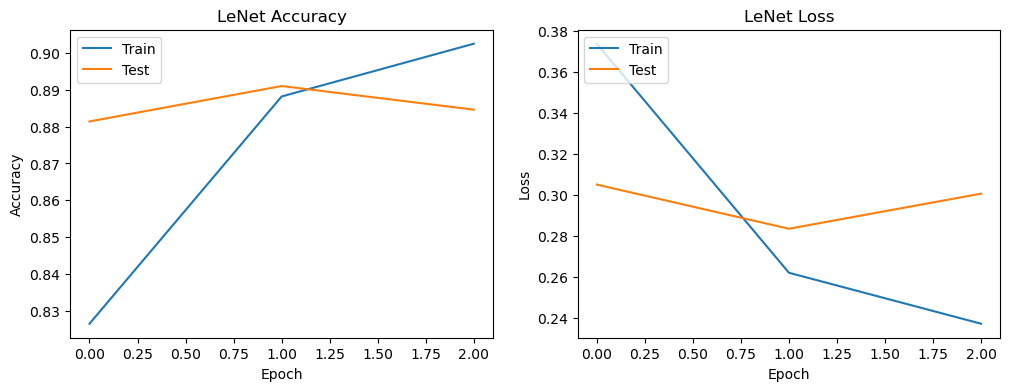

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
# plot accuracy and loss vs epoch
helper.plot_history(lenet_history, "LeNet")

### Plotting Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/var/folders/px/qy02cbjn2_s1svhmg7_fwh340000gq/T/ipykernel_5801/1795896883.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


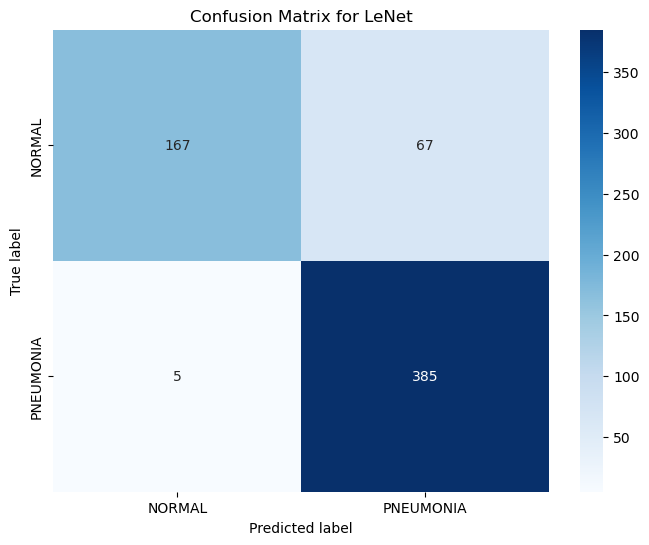

'"# Generate predictions from the test data\ny_pred = lenet_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)\n\n# Since y_pred is in probabilities, we need to convert them to binary predictions\ny_pred_binary = np.where(y_pred > 0.5, 1, 0).flatten()  # Ensure flattening if necessary\n\n# Get the true labels from the test data\ny_true = test_generator.classes\n\n# Compute the confusion matrix\ncm = confusion_matrix(y_true, y_pred_binary)\n\n# Plotting the confusion matrix\nplot_confusion_matrix(cm, "LeNet")\n\n# Print the classification report and accuracy\nprint_classification_report(y_true, y_pred_binary, "LeNet")'

<Figure size 640x480 with 0 Axes>

In [21]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "LeNet")

Classification Report for LeNet:
              precision    recall  f1-score   support

      NORMAL       0.97      0.71      0.82       234
   PNEUMONIA       0.85      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.85      0.87       624
weighted avg       0.90      0.88      0.88       624

Accuracy: 0.88


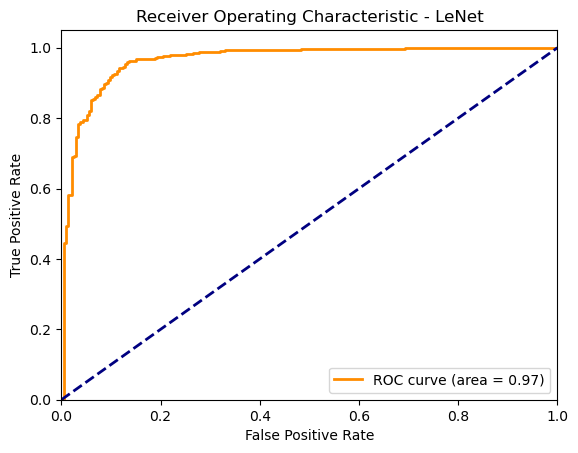

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [23]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for LeNet:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "LeNet")

## 2. AlexNet

In [27]:
# Generating data for AlexNet input shape
train_generator  = helper.datagen_train_dir("train",(32,32))
test_generator = helper.datagen_test_dir("test",(32,32))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [29]:
# Create AlexNet model
alexnet_model = alexnet.create_alexnet_model()

# Compile the model
alexnet_model.compile(optimizer=Adam(),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
alexnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,404,737 (16.80 MB)

 Trainable params: 4,404,737 (16.80 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
alexnet_history = alexnet_model.fit(train_generator, 
                                    epochs=10, 
                                    validation_data=test_generator)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 31s 182ms/step - accuracy: 0.7436 - loss: 0.5948 - val_accuracy: 0.6250 - val_loss: 0.6157


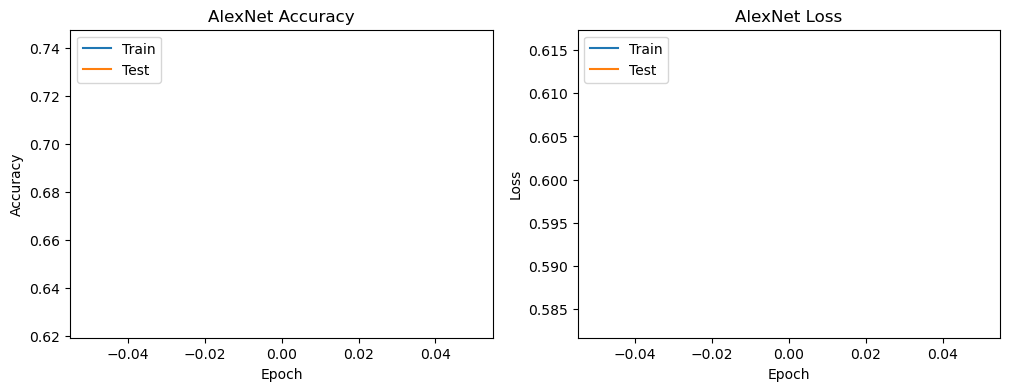

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [33]:
helper.plot_history(alexnet_history, "AlexNet")

### Plotting Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/var/folders/px/qy02cbjn2_s1svhmg7_fwh340000gq/T/ipykernel_5801/12124786.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


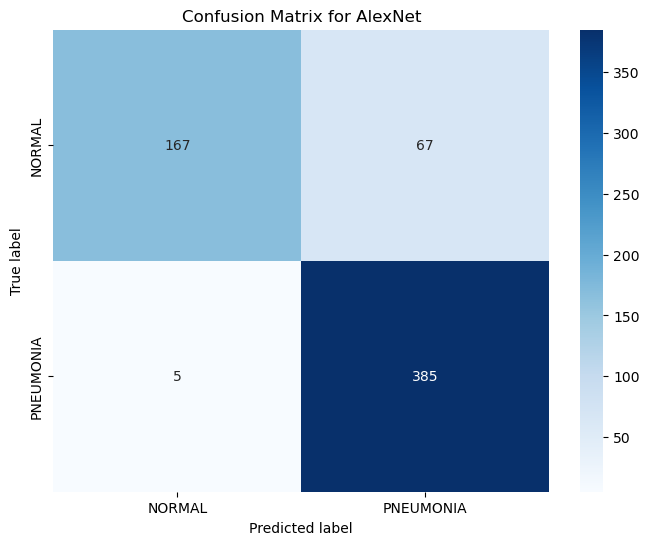

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [36]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "AlexNet")

Classification Report for AlexNet:
              precision    recall  f1-score   support

      NORMAL       0.97      0.71      0.82       234
   PNEUMONIA       0.85      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.85      0.87       624
weighted avg       0.90      0.88      0.88       624

Accuracy: 0.88


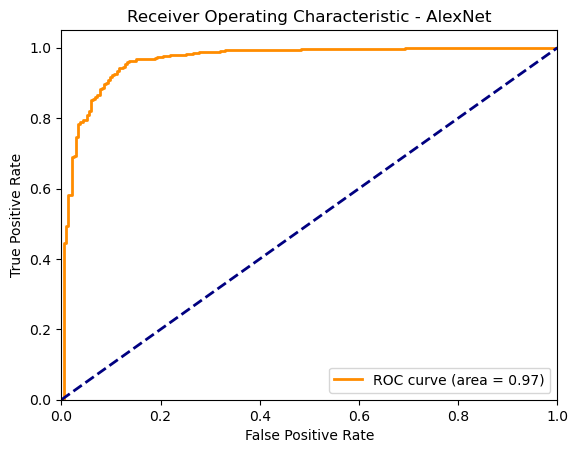

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [40]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for AlexNet:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "AlexNet")

## 3. VGG16

In [3]:
# Generating data for VGG input shape
train_generator  = helper.datagen_train_dir("train",(224,224))
test_generator = helper.datagen_test_dir("test",(224,224))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### 3.1. VGG16 built-in Keras

In [6]:
vgg_model = VGGNet.VGG()

# Compile the model
vgg_model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

vgg_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 21,137,729 (80.63 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
hist = vgg_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 1538s 9s/step - accuracy: 0.6692 - loss: 1.7591 - val_accuracy: 0.6250 - val_loss: 0.6157


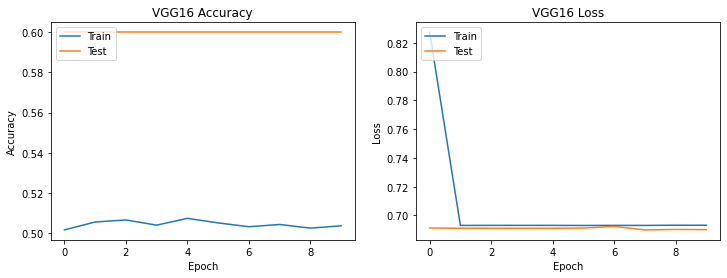

In [21]:
# plot accuracy and loss vs epoch
helper.plot_history(hist, "VGG16")

19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step


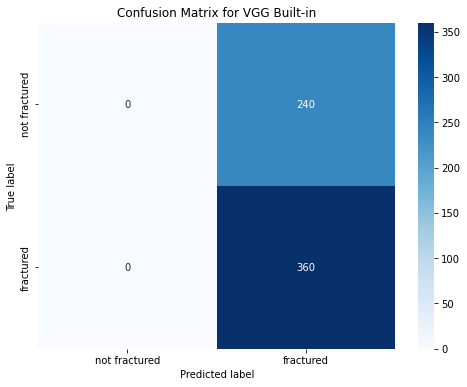

Classification Report for VGG Built-in:

               precision    recall  f1-score   support

not fractured       0.00      0.00      0.00       240
    fractured       0.60      1.00      0.75       360

     accuracy                           0.60       600
    macro avg       0.30      0.50      0.38       600
 weighted avg       0.36      0.60      0.45       600

Accuracy for VGG Built-in: 0.60


/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 432x288 with 0 Axes>

In [22]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "VGGNet")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for VGGNet:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "VGGNet")

### 3.2. VGG16 Implemented from Scratch

In [23]:
vgg16_model = VGGNet.VGG16_scratch()

# Compile the model
vgg16_model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

vgg16_model.summary()

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
hist = vgg16_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1233s 4s/step - accuracy: 0.4885 - loss: 0.6975 - val_accuracy: 0.6000 - val_loss: 0.6917
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1203s 4s/step - accuracy: 0.5084 - loss: 0.6931 - val_accuracy: 0.6000 - val_loss: 0.6916
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1237s 4s/step - accuracy: 0.5041 - loss: 0.6931 - val_accuracy: 0.6000 - val_loss: 0.6921
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1212s 4s/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.6000 - val_loss: 0.6913
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1221s 4s/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.6000 - val_loss: 0.6912
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1209s 4s/step - accuracy: 0.5080 - loss: 0.6931 - val_accuracy: 0.6000 - val_loss: 0.6912
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1203s 4s/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.6000 - val_loss: 0.6914
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1197s 4s/step - accuracy: 0.5115 - loss: 0.6930 - 

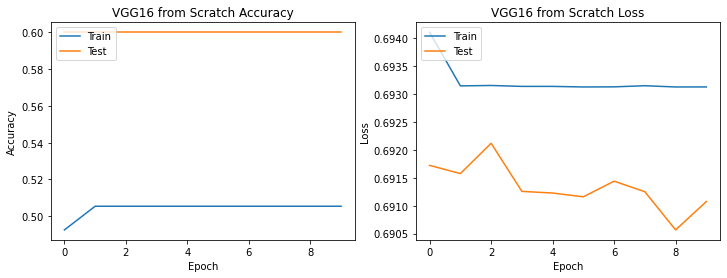

In [26]:
# plot accuracy and loss vs epoch
helper.plot_history(hist, "VGG16 from Scratch")

19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


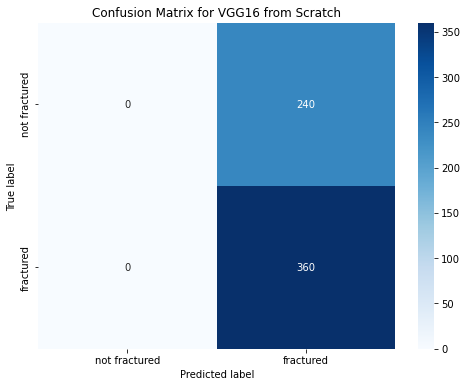

Classification Report for VGG16 from Scratch:

               precision    recall  f1-score   support

not fractured       0.00      0.00      0.00       240
    fractured       0.60      1.00      0.75       360

     accuracy                           0.60       600
    macro avg       0.30      0.50      0.38       600
 weighted avg       0.36      0.60      0.45       600

Accuracy for VGG16 from Scratch: 0.60


/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 432x288 with 0 Axes>

In [27]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "VGGNEt from Scratch")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for VGGNet:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "VGGNet from Scratch")

## 4. InceptionV3 (built-in Keras)

In [28]:
# Generating data for InceptionV3 w input shape (299,299,3)
train_generator  = helper.datagen_train_dir("train",(299, 299))
test_generator = helper.datagen_test_dir("test",(299, 299))

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [29]:
InceptionV3_model = InceptionV3.Inception_V3()

# Compile the model
InceptionV3_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

InceptionV3_model.summary()

In [30]:
hist = InceptionV3_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10


/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


277/277 ━━━━━━━━━━━━━━━━━━━━ 1326s 5s/step - accuracy: 0.7207 - loss: 0.5923 - val_accuracy: 0.6483 - val_loss: 2.4860
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 842s 3s/step - accuracy: 0.9305 - loss: 0.1879 - val_accuracy: 0.6333 - val_loss: 2.2792
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 838s 3s/step - accuracy: 0.9666 - loss: 0.0949 - val_accuracy: 0.5433 - val_loss: 2.5702
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 846s 3s/step - accuracy: 0.9749 - loss: 0.0745 - val_accuracy: 0.7567 - val_loss: 1.1031
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 833s 3s/step - accuracy: 0.9804 - loss: 0.0610 - val_accuracy: 0.6517 - val_loss: 7.0889
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 828s 3s/step - accuracy: 0.9864 - loss: 0.0431 - val_accuracy: 0.8133 - val_loss: 0.7503
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 852s 3s/step - accuracy: 0.9842 - loss: 0.0440 - val_accuracy: 0.6667 - val_loss: 0.5926
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 843s 3s/step - accuracy: 0.9899 - loss: 0.0352 - val_accuracy: 0.82

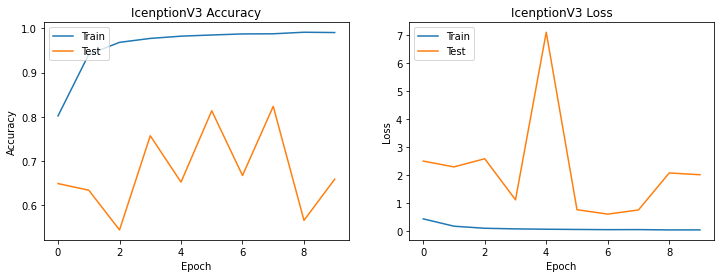

In [32]:
# plot accuracy and loss vs epoch
helper.plot_history(hist, "IcenptionV3")

19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 806ms/step


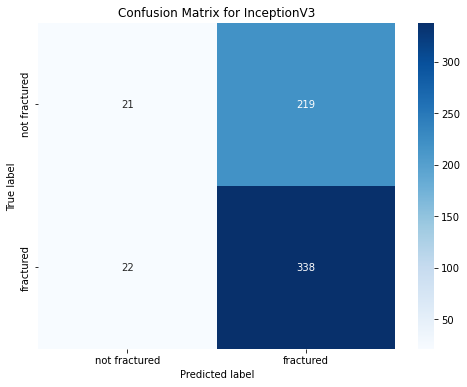

Classification Report for InceptionV3:

               precision    recall  f1-score   support

not fractured       0.49      0.09      0.15       240
    fractured       0.61      0.94      0.74       360

     accuracy                           0.60       600
    macro avg       0.55      0.51      0.44       600
 weighted avg       0.56      0.60      0.50       600

Accuracy for InceptionV3: 0.60


<Figure size 432x288 with 0 Axes>

In [33]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "InceptionV3")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "InceptionV3")

## 5. ResNet (ResNet50)

### 5.1. Model: Built-in ResNet50 with only one Fully Connected Layer

In [34]:
# Generating data for VGG input shape
train_generator  = helper.datagen_train_dir("train",(224, 224))
test_generator = helper.datagen_test_dir("test",(224, 224))

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [35]:
resnet50_seq_model = ResNet50.resnet50_seq()

# Compile the model
resnet50_seq_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

resnet50_model.summary()

In [36]:
resnet50_seq_history = resnet50_seq_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10


/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


277/277 ━━━━━━━━━━━━━━━━━━━━ 1236s 4s/step - accuracy: 0.6323 - loss: 0.6791 - val_accuracy: 0.6000 - val_loss: 19.2430
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1195s 4s/step - accuracy: 0.7772 - loss: 0.4674 - val_accuracy: 0.6000 - val_loss: 0.6962
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 752s 3s/step - accuracy: 0.8672 - loss: 0.3145 - val_accuracy: 0.6000 - val_loss: 9.0174
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 729s 3s/step - accuracy: 0.9276 - loss: 0.1823 - val_accuracy: 0.5583 - val_loss: 2.5917
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 746s 3s/step - accuracy: 0.9357 - loss: 0.1559 - val_accuracy: 0.6600 - val_loss: 3.8817
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 725s 3s/step - accuracy: 0.9687 - loss: 0.0884 - val_accuracy: 0.5833 - val_loss: 1.2407
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 746s 3s/step - accuracy: 0.9727 - loss: 0.0789 - val_accuracy: 0.6617 - val_loss: 1.6607
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 729s 3s/step - accuracy: 0.9803 - loss: 0.0547 - val_accuracy: 0.

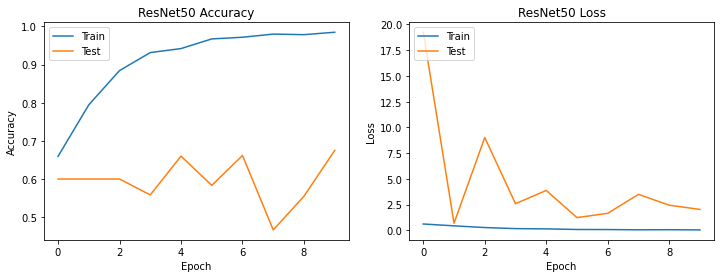

In [38]:
# plot accuracy and loss vs epoch
helper.plot_history(resnet50_seq_history, "ResNet50")

19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 662ms/step


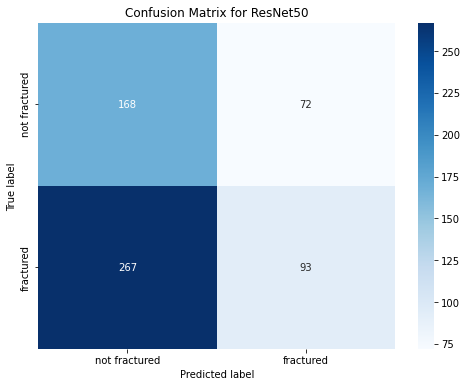

Classification Report for ResNet50:

               precision    recall  f1-score   support

not fractured       0.39      0.70      0.50       240
    fractured       0.56      0.26      0.35       360

     accuracy                           0.43       600
    macro avg       0.47      0.48      0.43       600
 weighted avg       0.49      0.43      0.41       600

Accuracy for ResNet50: 0.43


<Figure size 432x288 with 0 Axes>

In [39]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "ResNet50")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "ResNet50")

### 5.2. Built-in base model nontrainable with only one added fully connected layer

In [40]:
resnet50_nontrain_model = ResNet50.resnet50_nontrain()

# Compile the model
resnet50_nontrain_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

resnet50_model.summary()

In [41]:
resnet50_history = resnet50_nontrain_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 243s 840ms/step - accuracy: 0.5141 - loss: 0.7109 - val_accuracy: 0.7233 - val_loss: 0.6446
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.5564 - loss: 0.6778 - val_accuracy: 0.6000 - val_loss: 0.6541
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.5710 - loss: 0.6759 - val_accuracy: 0.6400 - val_loss: 0.6634
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.5878 - loss: 0.6623 - val_accuracy: 0.5783 - val_loss: 0.6231
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.5820 - loss: 0.6642 - val_accuracy: 0.6950 - val_loss: 0.6337
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.5915 - loss: 0.6549 - val_accuracy: 0.5583 - val_loss: 0.6899
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.6084 - loss: 0.6489 - val_accuracy: 0.5317 - val_loss: 0.6190
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.5864 - loss: 0.6554 - val_a

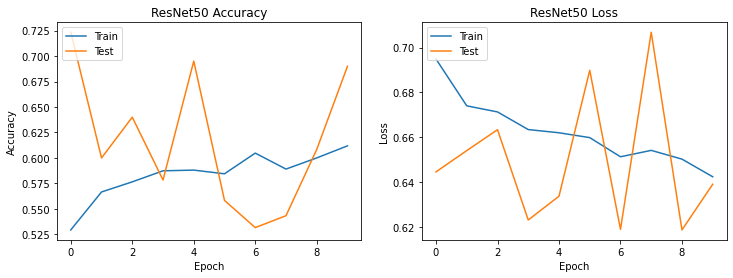

In [43]:
# plot accuracy and loss vs epoch
helper.plot_history(resnet50_history, "ResNet50")

19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 949ms/step


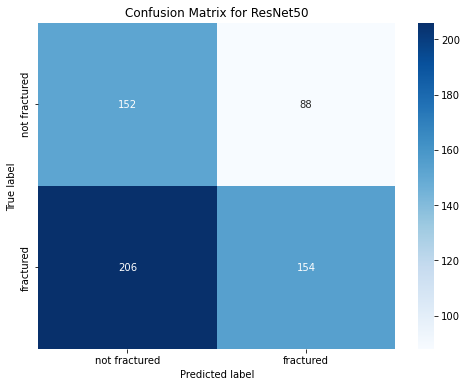

Classification Report for ResNet50:

               precision    recall  f1-score   support

not fractured       0.42      0.63      0.51       240
    fractured       0.64      0.43      0.51       360

     accuracy                           0.51       600
    macro avg       0.53      0.53      0.51       600
 weighted avg       0.55      0.51      0.51       600

Accuracy for ResNet50: 0.51


<Figure size 432x288 with 0 Axes>

In [44]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "ResNet50")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "ResNet50")

### 5.3. Model: Built-in Resnet50 with several normalisation layers added

In [46]:
resnet50_model = ResNet50.resnet50_nontrain_normalised()

# Compile the model
resnet50_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

 resnet50_model.summary()

In [47]:
resnet50_history = resnet50_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10


/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


277/277 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.5555 - loss: 0.8023 - val_accuracy: 0.5067 - val_loss: 0.7333
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.5797 - loss: 0.6940 - val_accuracy: 0.6167 - val_loss: 0.6551
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.6088 - loss: 0.6518 - val_accuracy: 0.6050 - val_loss: 0.6603
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.6611 - loss: 0.6166 - val_accuracy: 0.6083 - val_loss: 0.6591
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.6766 - loss: 0.5872 - val_accuracy: 0.5933 - val_loss: 0.6885
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.6928 - loss: 0.5789 - val_accuracy: 0.6100 - val_loss: 0.6321
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.7072 - loss: 0.5572 - val_accuracy: 0.6117 - val_loss: 0.6942
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.7212 - loss: 0.5366 - val_accuracy: 0.663

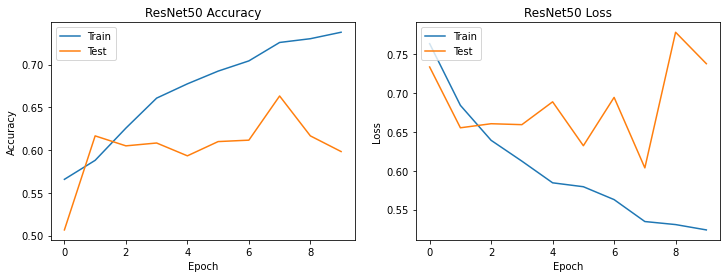

In [50]:
# plot accuracy and loss vs epoch
helper.plot_history(resnet50_history, "ResNet50")

19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 966ms/step


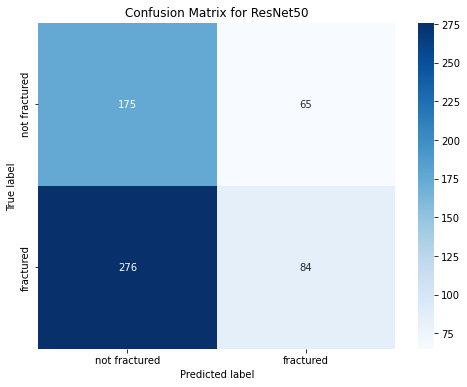

Classification Report for ResNet50:

               precision    recall  f1-score   support

not fractured       0.39      0.73      0.51       240
    fractured       0.56      0.23      0.33       360

     accuracy                           0.43       600
    macro avg       0.48      0.48      0.42       600
 weighted avg       0.49      0.43      0.40       600

Accuracy for ResNet50: 0.43


<Figure size 432x288 with 0 Axes>

In [51]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "ResNet50")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "ResNet50")

### 5.4. Data: Images with rotation/height/width adjusting
###    Model: Built-in Resnet50 with several normalisation layers added

In [52]:
train_dir = "train"
test_dir = "test"

# Data generators
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen_test = ImageDataGenerator(
    rescale=1./255
)

def datagen_train_dir(dir,in_shape):
    generator = datagen_train.flow_from_directory(
        dir,
        target_size=(in_shape[0], in_shape[1]), 
        batch_size= 32,
        class_mode='binary',  # Since class_mode is binary, labels will be 0 or 1
        classes=['not fractured', 'fractured']  # Specify the class labels explicitly
        )
    return generator

def datagen_test_dir(dir,in_shape):
    generator = datagen_test.flow_from_directory(
        dir,
        target_size=(in_shape[0], in_shape[1]), 
        batch_size=32,
        class_mode='binary',  # Since class_mode is binary, labels will be 0 or 1
        classes=['not fractured', 'fractured']  # Specify the class labels explicitly
        )
    return generator

# Generating data for VGG input shape
train_generator  = datagen_train_dir(train_dir,(224, 224))
test_generator = datagen_test_dir(test_dir,(224, 224))

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [53]:
resnet50_model = ResNet50.resnet50_nontrain_normalised()

# Compile the model
resnet50_model.compile(optimizer=Adam(),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

resnet50_model.summary()

Model: "functional_80"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_13[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,722,497 (189.68 MB)

 Trainable params: 25,933,185 (98.93 MB)

 Non-trainable params: 23,789,312 (90.75 MB)

In [55]:
resnet50_history = resnet50_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=10,
)

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.5888 - loss: 0.6728 - val_accuracy: 0.6233 - val_loss: 0.6112
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.5889 - loss: 0.6653 - val_accuracy: 0.6483 - val_loss: 0.5947
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.5931 - loss: 0.6609 - val_accuracy: 0.6433 - val_loss: 0.6020
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.6068 - loss: 0.6489 - val_accuracy: 0.6200 - val_loss: 0.6047
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 268s 958ms/step - accuracy: 0.6083 - loss: 0.6481 - val_accuracy: 0.6483 - val_loss: 0.6164
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 262s 926ms/step - accuracy: 0.6155 - loss: 0.6426 - val_accuracy: 0.6400 - val_loss: 0.5909
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 257s 907ms/step - accuracy: 0.6192 - loss: 0.6493 - val_accuracy: 0.6350 - val_loss: 0.6025
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.6161 - loss: 0.6470 -

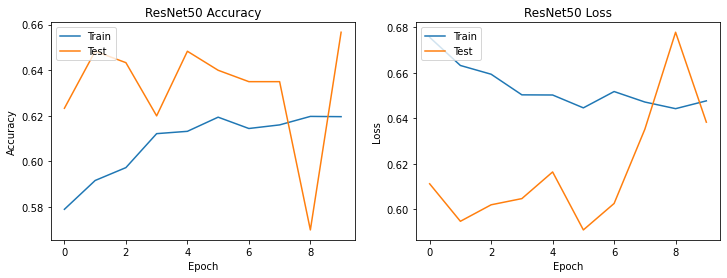

In [58]:
# plot accuracy and loss vs epoch
helper.plot_history(resnet50_history, "ResNet50")

19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 951ms/step


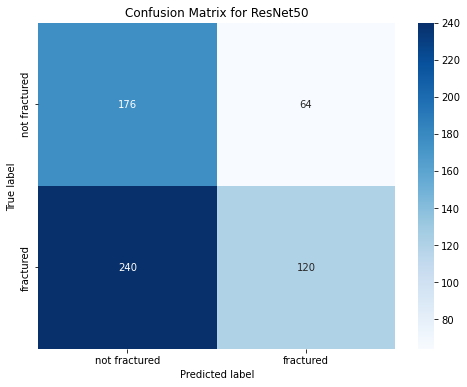

Classification Report for ResNet50:

               precision    recall  f1-score   support

not fractured       0.42      0.73      0.54       240
    fractured       0.65      0.33      0.44       360

     accuracy                           0.49       600
    macro avg       0.54      0.53      0.49       600
 weighted avg       0.56      0.49      0.48       600

Accuracy for ResNet50: 0.49


<Figure size 432x288 with 0 Axes>

In [60]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "ResNet50")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "ResNet50")

 ## New Model

In [ ]:
# Generating data for LeNet input shape
train_generator = helper.datagen_train_dir("train", (32, 32))
test_generator = helper.datagen_test_dir("test", (32, 32))

In [ ]:
newmodel = newmodel.newmodel()

# Compile the model
newmodel.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

newmodel.summary()

In [ ]:
newmodel_history = newmodel.fit(train_generator, 
                                epochs=20, 
                                validation_data=test_generator)

In [ ]:
# plot accuracy and loss vs epoch
helper.plot_history(newmodel_history, "New Model")

In [ ]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "New Model")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "New Model")

## 6. DesnNet

In [ ]:
# Generating data 
train_generator = helper.datagen_train_dir("train", (224, 224))
test_generator = helper.datagen_test_dir("test", (224, 224))

In [ ]:
densenet_model = DenseNet.densenet()

# Compile the model
densenet_model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

densenet_model.summary()

In [ ]:
densenet_history = densenet_model.fit(train_generator, 
                                epochs=10, 
                                validation_data=test_generator)

In [ ]:
# plot accuracy and loss vs epoch
helper.plot_history(densenet_history, "DenseNet")

In [ ]:
# Get true labels and predicted probabilities
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

y_true = []
y_pred = []

for i in range(test_steps_per_epoch):
    x_batch, y_batch = next(test_generator)
    y_true.extend(y_batch)
    y_pred.extend(lenet_model.predict(x_batch).ravel())

y_true = np.array(y_true)
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
helper.plot_confusion_matrix(cm, "DenseNet")

In [ ]:
# Calculate classification metrics
report = classification_report(y_true, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
accuracy = accuracy_score(y_true, y_pred_binary)

print(f"Classification Report for InceptionV3:\n{report}")
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve and AUC for LeNet
helper.plot_roc_auc(y_true, y_pred, "DenseNet")

## Model Comparison

| Metric | LeNet | AlexNet | VGG  Built-In | VGG from Scratch | InceptionV3 | ResNet50 Built-in | ResNet50 Built-in & nontrain| ResNet  Built-in & nontrainable & Normalised | ResNet Built-in & nontrain  & normalised & Data adjusted |
|:------:|:-----:|:-------:|:-------------:|:----------------:|:-----------:|:-----------------:|:----------------------------:|:-------------------------------------------:|:-------------------------------------------------------:|
| Accuracy|   0.51   |     0.47    |         0.66      |        0.60         |        0.60      |         0.43          |                                         0.51   |      0.43    | 0.49
|Precesion|   0.53   |    0.51     |      0.36         |       0.36          |     0.56         |          0.49         |                                       0.55     |     0.49    | 0.56 
|Recall|   0.51   |     0.47    |         0.60      |        0.60         |      0.60        |          0.43         |                                       0.51     |      0.443   |  0.49
|F1-Score|    0.51  |     0.48    |       0.45        |        0.45         |     0.50         |            0.41       |                                        0.51    |     0.40     | 0.48

